# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [1]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [22]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

# set mapbox access token
px.set_mapbox_access_token(mapbox_token)

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("./Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 
fig_housing_units = sfo_data['housing_units'].groupby('year').mean()
fig_housing_units

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

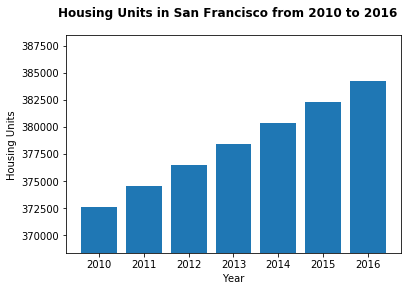

In [48]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
min_units = min(fig_housing_units)
max_units = max(fig_housing_units)
std_units = fig_housing_units.std()

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
plt.bar(
    fig_housing_units.index,
    fig_housing_units,
)
plt.ylim(
    (min_units - std_units),
    (max_units + std_units)
)
plt.suptitle(
    'Housing Units in San Francisco from 2010 to 2016',
    weight='bold'
)
plt.xlabel('Year')
plt.ylabel('Housing Units')
plt.show()
plt.close()

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [6]:
# Calculate the average gross rent and average sale price per square foot
sales_rent = sfo_data[['sale_price_sqr_foot', 'gross_rent']].groupby('year').mean()
sales_rent

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528
2015           632.540352        3739
2016           697.643709        4390

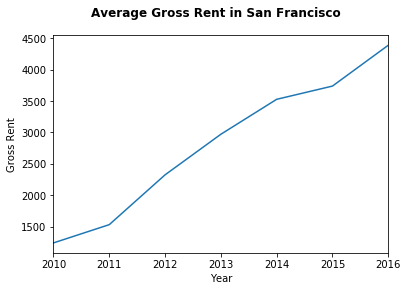

In [36]:
# Plot the Average Gross Rent per Year as a Line Chart 
plt.plot(
    sales_rent.index, 
    sales_rent['gross_rent']
)
plt.xlim(
    sales_rent.index[0],
    sales_rent.index[-1]
)
plt.suptitle(
    'Average Gross Rent in San Francisco',
    weight='bold'
)
plt.xlabel('Year')
plt.ylabel('Gross Rent')
plt.show()
plt.close()

### Average Sales Price per Year

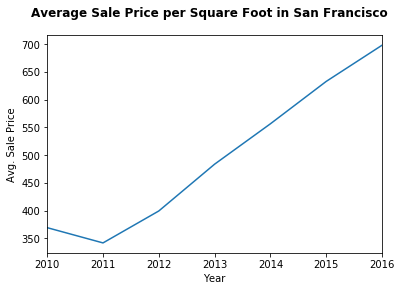

In [8]:
# Plot the Average Sales Price per Year as a line chart
plt.plot(sales_rent.index, sales_rent['sale_price_sqr_foot'])
plt.xlim(sales_rent.index[0],sales_rent.index[-1])
plt.suptitle('Average Sale Price per Square Foot in San Francisco', weight='bold')
plt.xlabel('Year')
plt.ylabel('Avg. Sale Price')
plt.show()
plt.close()

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [9]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sfo_df = sfo_data.groupby(['year', 'neighborhood']).mean()
sfo_df.head(10)

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239
     Central Sunset             418.172493         372560        1239
     Corona Heights             369.359338         372560        1239
     Cow Hollow                 569.379968         372560        1239
     Croker Amazon              165.645730         372560        1239
     Diamond Heights            456.930822         372560        1239

In [10]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
sfo_df['sale_price_sqr_foot'].hvplot(
    xlabel='year',
    ylabel='average sale per square foot',
    label=' ',
    groupby='neighborhood',
    height=300,
    width=450
)

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [11]:
# Getting the data from the top 10 expensive neighborhoods
most_expensive = sfo_data.groupby('neighborhood')\
                .mean()\
                .sort_values(ascending=False, by='sale_price_sqr_foot')

In [12]:
most_expensive.head(10)

sale_price_sqr_foot  housing_units   gross_rent
neighborhood                                                          
Union Square District           903.993258      377427.50  2555.166667
Merced Heights                  788.844818      380348.00  3414.000000
Miraloma Park                   779.810842      375967.25  2155.250000
Pacific Heights                 689.555817      378401.00  2817.285714
Westwood Park                   687.087575      382295.00  3959.000000
Telegraph Hill                  676.506578      378401.00  2817.285714
Presidio Heights                675.350212      378401.00  2817.285714
Cow Hollow                      665.964042      378401.00  2817.285714
Potrero Hill                    662.013613      378401.00  2817.285714
South Beach                     650.124479      375805.00  2099.000000

In [13]:
# Plotting the data from the top 10 expensive neighborhoods
most_expensive['sale_price_sqr_foot'].head(10).hvplot.bar(
    ylabel='average sale price per square foot',
    xlabel='neighborhood',
    label='top 10 most expensive neighborhoods',
    rot=40,
    height=400,
    width=650,
)


:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

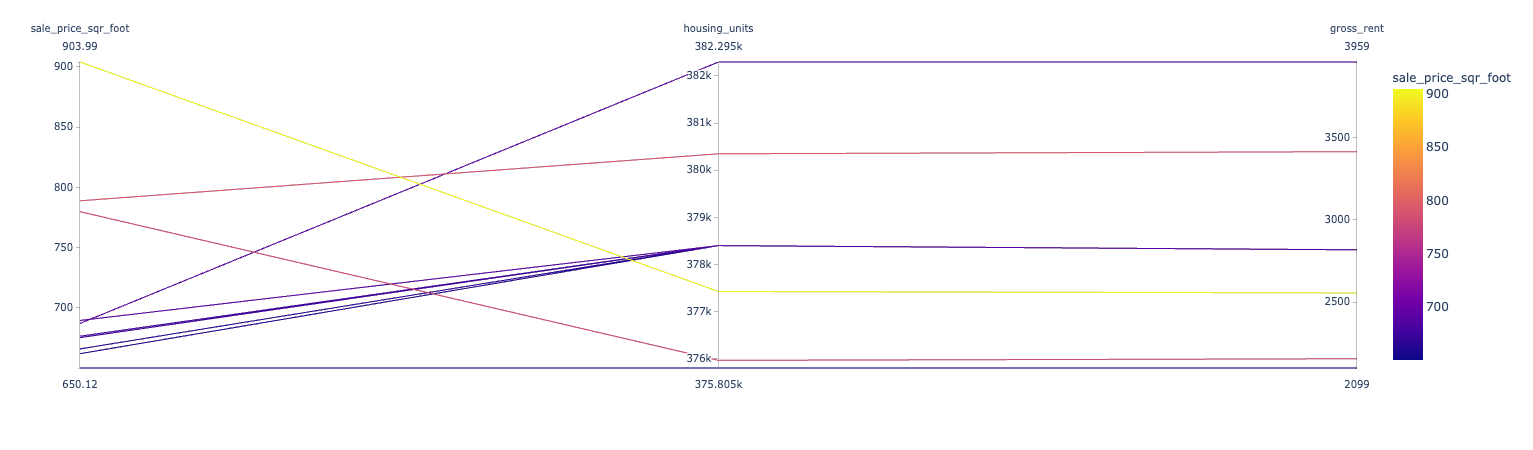

In [14]:
# Parallel Coordinates Plot
px.parallel_coordinates(
    most_expensive.head(10),
    color='sale_price_sqr_foot'
)

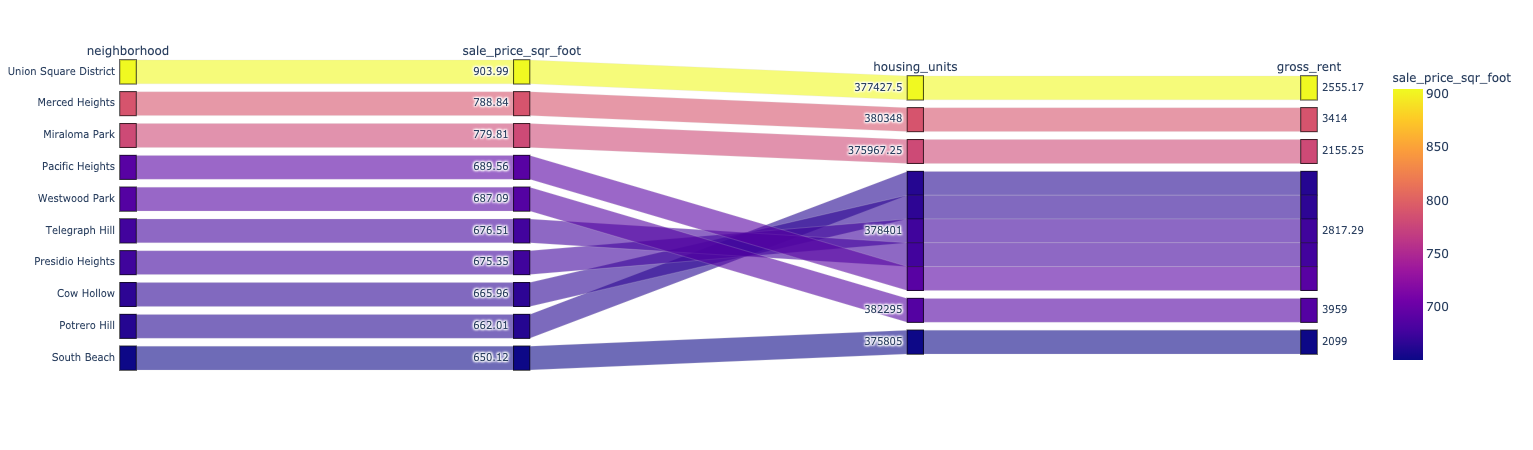

In [15]:
# Parallel Categories Plot
parallel_df = most_expensive.reset_index()
parallel_df = parallel_df.round(decimals=2)
px.parallel_categories(
    parallel_df.head(10),
    color='sale_price_sqr_foot'
)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [16]:
# Load neighborhoods coordinates data
file_path = Path("./Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [17]:
# Calculate the mean values for each neighborhood
parallel_df.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  Union Square District               903.99      377427.50     2555.17
1         Merced Heights               788.84      380348.00     3414.00
2          Miraloma Park               779.81      375967.25     2155.25
3        Pacific Heights               689.56      378401.00     2817.29
4          Westwood Park               687.09      382295.00     3959.00

In [18]:
# Join the average values with the neighborhood locations
neighborhood_combined = parallel_df.join(
    df_neighborhood_locations.set_index('Neighborhood'),
    how='inner',
    on='neighborhood'
)
neighborhood_combined.head(10)

neighborhood  sale_price_sqr_foot  housing_units  gross_rent  \
0  Union Square District               903.99      377427.50     2555.17   
1         Merced Heights               788.84      380348.00     3414.00   
2          Miraloma Park               779.81      375967.25     2155.25   
3        Pacific Heights               689.56      378401.00     2817.29   
4          Westwood Park               687.09      382295.00     3959.00   
5         Telegraph Hill               676.51      378401.00     2817.29   
6       Presidio Heights               675.35      378401.00     2817.29   
7             Cow Hollow               665.96      378401.00     2817.29   
8           Potrero Hill               662.01      378401.00     2817.29   
9            South Beach               650.12      375805.00     2099.00   

        Lat        Lon  
0  37.79101 -122.40210  
1  37.71993 -122.46595  
2  37.73415 -122.45700  
3  37.79298 -122.43579  
4  37.73415 -122.45700  
5  37.80055 -122.40433  
6  37.78553 -122.45600  
7  37.79298 -122.43579  
8  37.73196 -122.38324  
9  37.78323 -122.40065

### Mapbox Visualization

Plot the average values per neighborhood with a plotly express scatter_mapbox visualization.

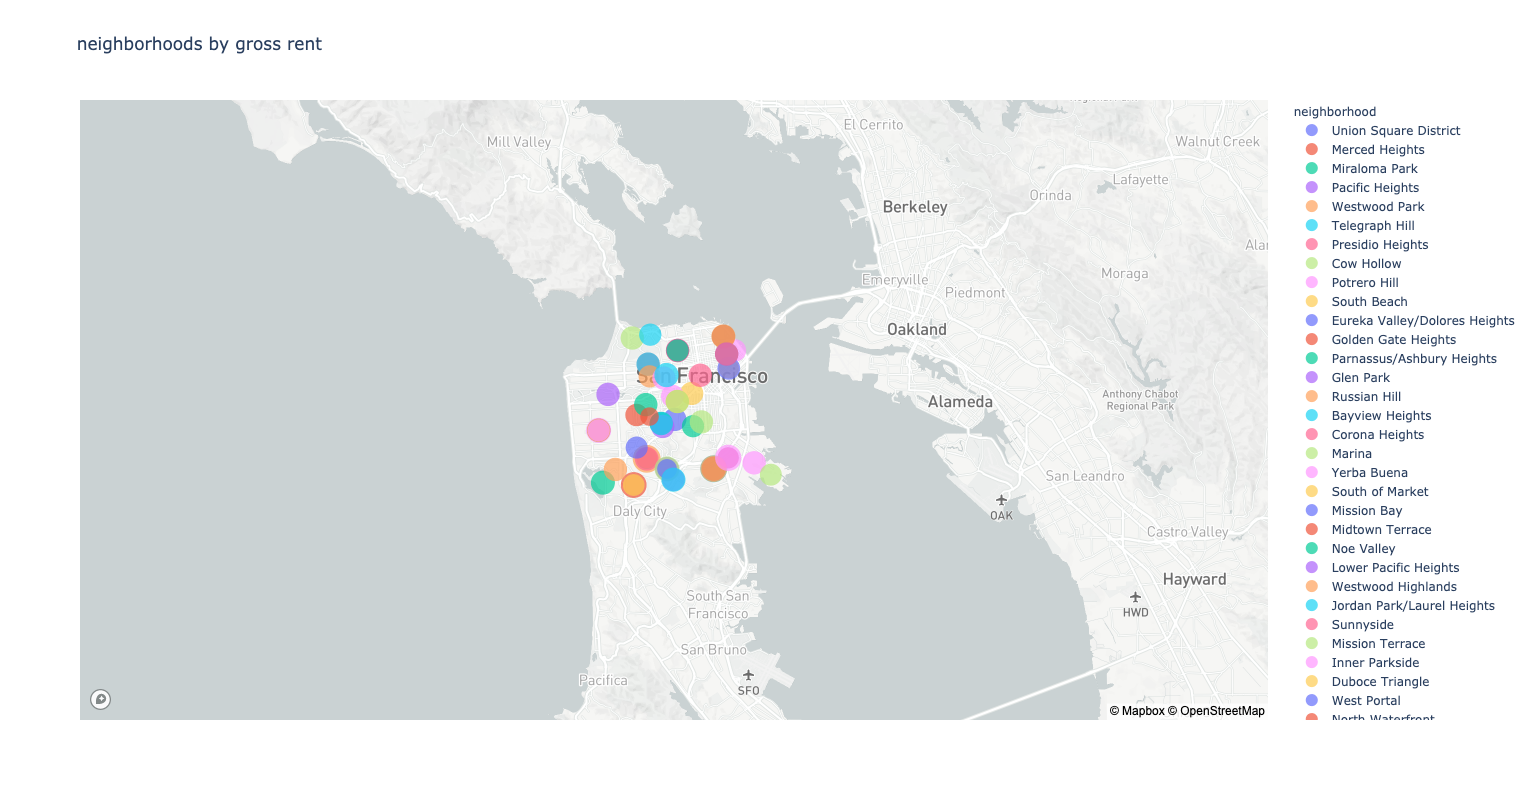

In [39]:
# Create a scatter mapbox to analyze neighborhood info
px.scatter_mapbox(
    neighborhood_combined,
    lat="Lat",
    lon="Lon",
    size="gross_rent",
    color="neighborhood",
    zoom=10,
    title='neighborhoods by gross rent',
    height=800,
    width=1000,
)

In [40]:
px.scatter_mapbox(
    neighborhood_combined,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="neighborhood",
    zoom=10,
    title='neighborhoods by average sale price per square foot',
    height=800,
    width=1000,
)